In [2]:
import pandas as pd
df = pd.read_csv("spam-apache.csv")
df.to_csv("spamassasin.csv", index = False)

In [10]:
data1 = pd.read_csv("spamassasin.csv")
data1['label'] = data['label'].apply(lambda x: "spam" if x == -1 else "ham")
data1.head()

,message,label
0,> Russell Turpin:\n> > That depends on how the...,ham
1,Help wanted. We are a 14 year old fortune 500...,ham
2,Request A Free No Obligation Consultation!\nAc...,ham
3,Is there a way to look for a particular file o...,ham
4,"Hi,\n\nThank you for the useful replies, I hav...",ham


In [11]:
data2 = pd.read_csv("enron_spam_data.csv")

In [12]:
data2 = data2.loc[:, ~data2.columns.str.contains("^Unnamed")]
data2.head()

,message,label
0,"gary , production from the high island larger ...",ham
1,- calpine daily gas nomination 1 . doc,ham
2,fyi - see note below - already done .\nstella\...,ham
3,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham
4,"jackie ,\nsince the inlet to 3 river plant is ...",ham


In [13]:
spam_ham_dataset = pd.read_csv('spam_ham_dataset.csv')
spam_ham_dataset = spam_ham_dataset.loc[:, ~spam_ham_dataset.columns.str.contains("^Unnamed")]
spam_ham_dataset.head()

,message,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of the Final Merged dataset:  (62111, 2)
Model: Logistic Regression
Accuracy: 0.9690
Precision: 0.9472
Recall: 0.9929
F1 Score: 0.9695
----------------------------------------


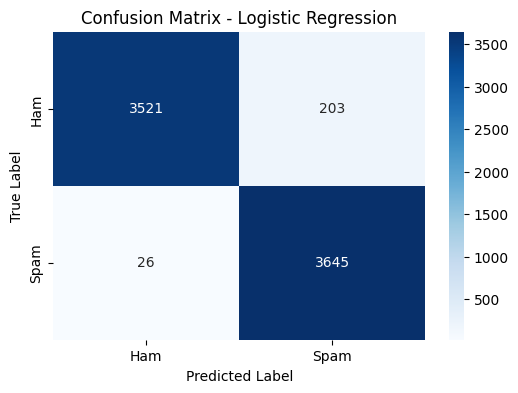

Model: Decision Tree Classifier
Accuracy: 0.9239
Precision: 0.8895
Recall: 0.9668
F1 Score: 0.9265
----------------------------------------


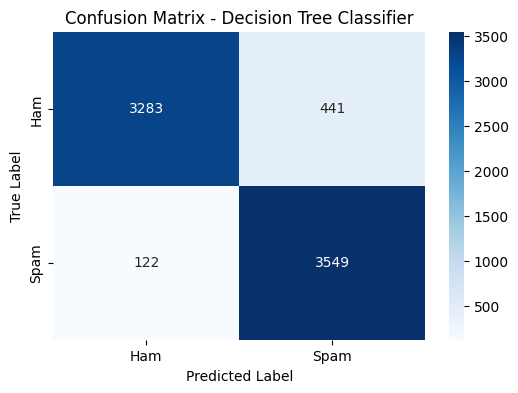

Model: Random Forest Classifier
Accuracy: 0.9202
Precision: 0.8639
Recall: 0.9962
F1 Score: 0.9254
----------------------------------------


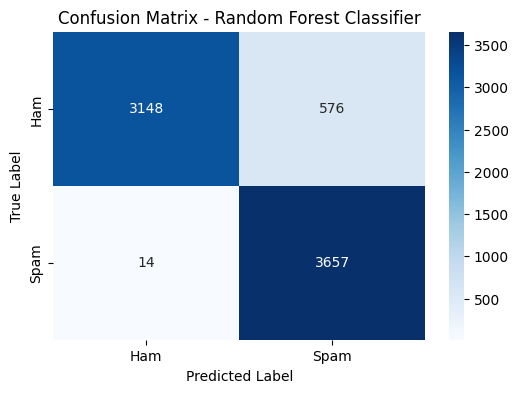

Model: K Nearest Neighbours
Accuracy: 0.7880
Precision: 0.7019
Recall: 0.9959
F1 Score: 0.8234
----------------------------------------


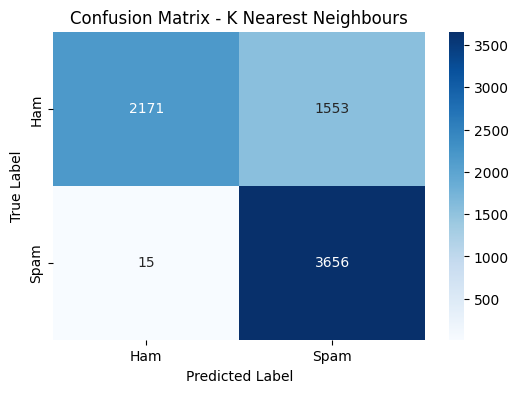

Model: AdaBoost Classifier
Accuracy: 0.9064
Precision: 0.8506
Recall: 0.9845
F1 Score: 0.9126
----------------------------------------


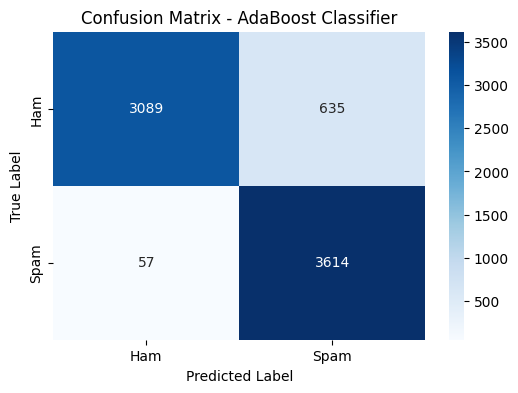

Model: Multinomial Naive Bayes
Accuracy: 0.9717
Precision: 0.9681
Recall: 0.9752
F1 Score: 0.9716
----------------------------------------


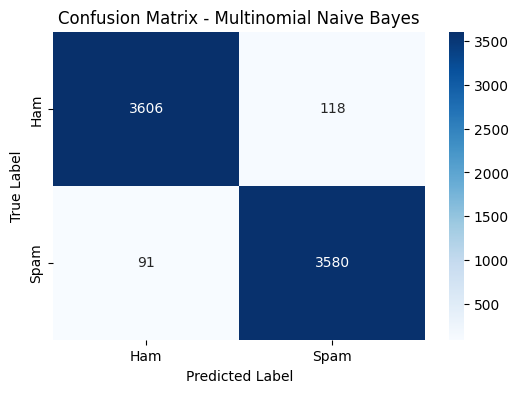

Voting Classifier Improved Accuracy
Accuracy_voting: 0.9738
Precision_voting: 0.9521
Recall_voting: 0.9973
F1_score_voting: 0.9742
----------------------------------------


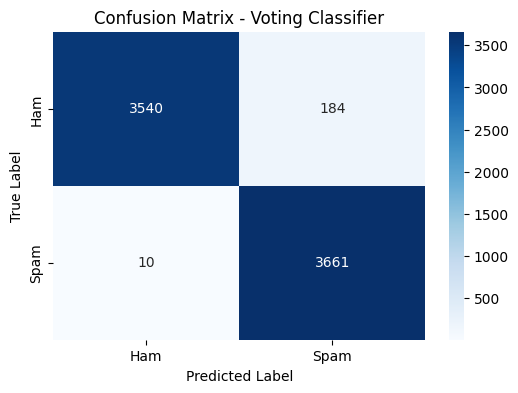

Stacking Model Improved Accuracy
Accuracy_stack: 0.9817
Precision_stack: 0.9730
Recall_stack: 0.9907
F1_score_stack: 0.9818
Cross-validated accuracy: 0.982
----------------------------------------


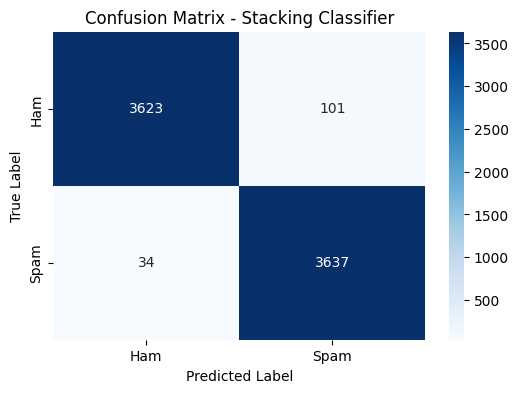

<Figure size 1000x600 with 0 Axes>

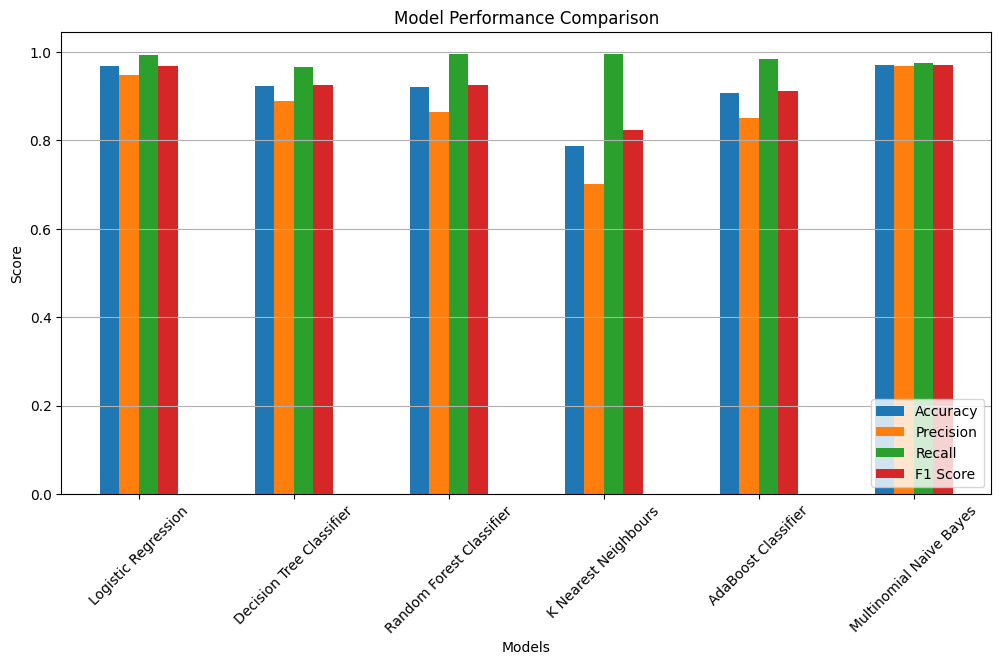

Model and vectorizer saved successfully.


In [27]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)                     # Remove special characters
    text = re.sub(r'\d+', '', text)                     # Remove digits
    text = text.lower()                                 # Convert to lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text
enron = pd.DataFrame(data2).reset_index(drop=True)
spam_assassin = pd.DataFrame(data1).reset_index(drop=True)
spam_ham_dataset = pd.DataFrame(spam_ham_dataset).reset_index(drop=True)
data = pd.concat([enron, spam_assassin, spam_ham_dataset], ignore_index=True)
print("Shape of the Final Merged dataset: ", data.shape)
spam = data[data['label'] == 'spam']
ham = data[data['label'] == 'ham']
balanced = pd.concat([spam, ham.sample(n=min(len(spam), len(ham)), random_state=42)])
balanced = balanced.dropna(subset=['message'])
balanced['message'] = balanced['message'].apply(clean_text)
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=20000, ngram_range = (1, 3), min_df=2, max_df=0.9)
X = vectorizer.fit_transform(balanced['message'])
y = balanced['label'].apply(lambda x: 1 if x == 'spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models = [
    ('Logistic Regression', LogisticRegression(C=0.1, penalty='l2', max_iter=1000)),
    ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=15, min_samples_split=5)),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1)),
    ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=5, weights='distance')),
    ('AdaBoost Classifier', AdaBoostClassifier(n_estimators=100, learning_rate=0.1)), 
    ('Multinomial Naive Bayes', MultinomialNB(alpha=0.1))
]
results = {}
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [accuracy, precision, recall, f1]
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
voting_model = VotingClassifier(estimators=base_models, voting='soft', weights=[10, 5, 8, 2, 4, 7])
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
print("Voting Classifier Improved Accuracy")
print(f"Accuracy_voting: {accuracy_voting:.4f}")
print(f"Precision_voting: {precision_voting:.4f}")
print(f"Recall_voting: {recall_voting:.4f}")
print(f"F1_score_voting: {f1_voting:.4f}")
print("-" * 40)
cm = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=voting_model, n_jobs=-1, stack_method='predict_proba')
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stacking)
precision_stack = precision_score(y_test, y_pred_stacking)
recall_stack = recall_score(y_test, y_pred_stacking)
f1_stack = f1_score(y_test, y_pred_stacking)
print("Stacking Model Improved Accuracy")
print(f"Accuracy_stack: {accuracy_stack:.4f}")
print(f"Precision_stack: {precision_stack:.4f}")
print(f"Recall_stack: {recall_stack:.4f}")
print(f"F1_score_stack: {f1_stack:.4f}")
scores = cross_val_score(stacking_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.3f" % scores.mean())
print("-" * 40)
cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
plt.figure(figsize=(10, 6))
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(stacking_model, model_file)
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
print("Model and vectorizer saved successfully.")